In [14]:
import sqlite3
import pandas as pd

"""
Script to load standardized barangay data from a CSV file into an SQLite database.

This script performs the following steps:
1. Connects to the SQLite database file named 'stand_datasets.db'.
2. Reads the data from the CSV file 'BRGY_STANDARDIZED.csv' into a pandas DataFrame.
3. Writes the contents of the DataFrame to a new table named 'BRGY_STANDARDIZED'
   within the database. If the table already exists, it is replaced.
4. Closes the connection to the database.

The script prints the head of the DataFrame for inspection before writing and
a confirmation message upon successful completion.

:raises FileNotFoundError: If 'BRGY_STANDARDIZED.csv' does not exist in the
                         script's execution directory.
:raises sqlite3.Error: For issues related to the database connection or operation.
"""


# --- Connect to SQLite database ---
conn = sqlite3.connect('stand_datasets.db')
cursor = conn.cursor()

# --- Load the CSV file ---
df_brg = pd.read_csv('BRGY_STANDARDIZED.csv')

# --- Optional: inspect the first few rows ---
print(df_brg.head())

# --- Write to SQLite database ---
# This will create a new table called BRGY_STANDARDIZED, or replace if it exists
df_brg.to_sql('BRGY_STANDARDIZED', conn, if_exists='replace', index=False)

print("✅ BRGY_STANDARDIZED.csv has been added to stand_datasets.db")

# --- Close connection ---
conn.close()


          uuid   adm4_pcode        date freq  brgy_total_area  \
0  BGEOG000118  PH063022084  2003-01-01    S           0.1906   
1  BGEOG000119  PH063022081  2003-01-01    S           0.0434   
2  BGEOG00011A  PH063022178  2003-01-01    S           0.5440   
3  BGEOG00011B  PH063022189  2003-01-01    S           0.1176   
4  BGEOG00011C  PH063022064  2003-01-01    S           0.8889   

   brgy_distance_to_coast  brgy_is_coastal  \
0                1.081299            False   
1               -0.876514            False   
2                1.217963            False   
3               -0.593102            False   
4                1.766896            False   

                                            geometry  \
0  POLYGON ((122.564165144 10.720567741, 122.5647...   
1  POLYGON ((122.567721911 10.6961068380001, 122....   
2  POLYGON ((122.547468591 10.719607266, 122.5480...   
3  POLYGON ((122.561661708 10.697889806, 122.5616...   
4  POLYGON ((122.534580907 10.727787967, 122.5363...

In [15]:
import sqlite3
import pandas as pd

"""
Docstring for a Python script.

This docstring describes a script's function, which is to **load and transfer**
standardized barangay data from a **CSV file** ('BRGY_STANDARDIZED.csv') into an
**SQLite database** ('stand_datasets.db').

It details the steps of the process (connect, read, write, close),
the output messages, and the specific **exceptions** that can be raised
($\text{FileNotFoundError}$ and $\text{sqlite3.Error}$).
"""

# --- Connect to SQLite database ---
conn = sqlite3.connect('stand_datasets.db')
cursor = conn.cursor()

# --- Get all table names ---
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]

# --- Loop through tables and preview ---
for table in tables:
    print(f"\n--- Table: {table} ---")
    df = pd.read_sql(f"SELECT * FROM {table} LIMIT 5;", conn)  # preview first 5 rows
    print(df)

# --- Close connection ---
conn.close()



--- Table: AMENITY_STANDARDIZED ---
          uuid   adm4_pcode        date  college_nearest  \
0  osmpa001e83  ph063022075  2022-01-01        -0.671659   
1  osmpa001cac  ph063022085  2022-01-01        -0.907662   
2  osmpa001cab  ph063022132  2022-01-01        -0.862404   
3  osmpa001caa  ph063022092  2022-01-01        -0.629517   
4  osmpa001ca9  ph063022054  2022-01-01        -1.044080   

   community_centre_nearest  school_nearest  shelter_nearest  \
0                 -0.745288       -0.042481        -1.108379   
1                 -0.771310       -0.743222        -0.862537   
2                 -0.674097        0.013941        -0.968495   
3                 -0.674470        0.106331        -0.578905   
4                 -0.756960       -0.743222        -1.108413   

   town_hall_nearest  university_nearest             location1.adm4_en  \
0          -0.997424           -0.802596  delgado-jalandoni-bagumbayan   
1          -0.528983           -0.885474                        lagud

In [198]:
import sqlite3
import pandas as pd
"""
Connects to a SQLite database, iterates through all its tables, and
attempts to extract and print the distinct years present in any column
named 'date' (case-insensitive) using the SQLite strftime function.

This function relies on a 'date' column existing and the values within it
being recognizable by SQLite's date/time functions for year extraction.

Returns
-------
None
    Prints the distinct years (as a pandas DataFrame) for each table
    that contains a 'date' column, along with status messages.
"""
# --- Connect to SQLite database ---
conn = sqlite3.connect('stand_datasets.db')
cursor = conn.cursor()

# --- Get all table names ---
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]

# --- Loop through tables and extract years ---
for table in tables:
    print(f"\n--- Table: {table} ---")
    
    # Get columns for the table
    cursor.execute(f"PRAGMA table_info({table});")
    columns = [col[1] for col in cursor.fetchall()]
    
    # Check if a 'date' column exists
    date_col = None
    for col in columns:
        if col.lower() == 'date':
            date_col = col
            break
    
    if date_col:
        # Try to extract distinct years from date column
        try:
            df_dates = pd.read_sql(f"SELECT DISTINCT strftime('%Y', {date_col}) AS year FROM {table} ORDER BY year;", conn)
            print(df_dates)
        except Exception as e:
            print(f"⚠️ Couldn't extract years from {date_col}: {e}")
    else:
        print("No 'date' column found.")

# --- Close connection ---
conn.close()



--- Table: AMENITY_STANDARDIZED ---
   year
0  2014
1  2015
2  2016
3  2017
4  2018
5  2019
6  2020
7  2021
8  2022

--- Table: CLIMATE_STANDARDIZED ---
    year
0   2003
1   2004
2   2005
3   2006
4   2007
5   2008
6   2009
7   2010
8   2011
9   2012
10  2013
11  2014
12  2015
13  2016
14  2017
15  2018
16  2019
17  2020
18  2021
19  2022

--- Table: HEALTH_STANDARDIZED ---
   year
0  2022

--- Table: POP_STANDARDIZED ---
    year
0   2000
1   2001
2   2002
3   2003
4   2004
5   2005
6   2006
7   2007
8   2008
9   2009
10  2010
11  2011
12  2012
13  2013
14  2014
15  2015
16  2016
17  2017
18  2018
19  2019
20  2020

--- Table: RWI_STANDARDIZED ---
   year
0  2016
1  2017
2  2018
3  2019
4  2020
5  2021
6  2022

--- Table: CLIMATE_INDEX ---
No 'date' column found.

--- Table: CLIMATE_PCA_INDEX ---
No 'date' column found.

--- Table: BRGY_STANDARDIZED ---
   year
0  2003

--- Table: CLIMATE_EXPOSURE_CLUSTER ---
No 'date' column found.

--- Table: CLIMATE_EXPOSURE_INDEX ---
No 'date' c

In [16]:
import sqlite3
"""
Counts and prints the total number of rows for every table in the
'stand_datasets.db' SQLite database.

It connects to the specified database, retrieves a list of all table names,
and executes a 'SELECT COUNT(*)' query for each table to determine its
row count, printing the results to the console.

Returns
-------
None
    Prints the name and row count for each table in the database.
"""

# --- Connect to SQLite database ---
conn = sqlite3.connect('stand_datasets.db')
cursor = conn.cursor()

# --- Get all table names ---
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [t[0] for t in cursor.fetchall()]

# --- Print row count per table ---
print("Number of rows per table:")
for table in tables:
    cursor.execute(f"SELECT COUNT(*) FROM {table};")
    count = cursor.fetchone()[0]
    print(f"{table}: {count} rows")

# --- Close connection ---
conn.close()


Number of rows per table:
AMENITY_STANDARDIZED: 1620 rows
CLIMATE_STANDARDIZED: 1314900 rows
HEALTH_STANDARDIZED: 180 rows
POP_STANDARDIZED: 3780 rows
RWI_STANDARDIZED: 1260 rows
CLIMATE_INDEX: 180 rows
CLIMATE_PCA_INDEX: 180 rows
CLIMATE_EXPOSURE_INDEX: 180 rows
BRGY_STANDARDIZED: 180 rows


In [200]:
import sqlite3
import pandas as pd

"""
Retrieves and displays the most recent data from a predefined list of tables
within an SQLite database.

This script connects to the 'stand_datasets.db' database and iterates through
a list of standardized tables. For each table, it performs the following steps:
1.  **Identifies the latest date** present in the 'date' column using the
    SQL $\text{MAX(date)}$ function.
2.  **Selects all rows** from the table that correspond to this latest date.
3.  **Stores the resulting DataFrame** in a dictionary ($\text{latest\_data}$)
    where the table name is the key.
4.  **Prints a confirmation message** indicating the table name and the latest date
    found, followed by the first five rows ($\text{head()}$) of the retrieved data.

The script uses pandas ($\text{pd.read\_sql}$) to execute SQL queries and load
the results directly into DataFrames. The database connection is closed after
processing all tables.

:raises sqlite3.Error: If the database file cannot be opened, or if a table
                     listed in $\text{tables\_latest}$ does not exist in the database,
                     or if there's an issue executing the SQL queries.
:returns: A dictionary ($\text{latest\_data}$) where keys are table names and
          values are pandas DataFrames containing the rows associated with the
          maximum 'date' found in that respective table.
"""

# --- Connect to SQLite database ---
conn = sqlite3.connect('stand_datasets.db')

# List of tables to get latest date
tables_latest = ['AMENITY_STANDARDIZED', 'HEALTH_STANDARDIZED', 'POP_STANDARDIZED', 'RWI_STANDARDIZED']

latest_data = {}

for table in tables_latest:
    # Get the latest date for this table
    latest_date_query = f"SELECT MAX(date) FROM {table};"
    latest_date = pd.read_sql(latest_date_query, conn).iloc[0, 0]
    
    # Select rows with that latest date
    df = pd.read_sql(f"SELECT * FROM {table} WHERE date = '{latest_date}';", conn)
    
    latest_data[table] = df
    print(f"\n--- Latest data for table: {table} (date={latest_date}) ---")
    print(df.head())

conn.close()



--- Latest data for table: AMENITY_STANDARDIZED (date=2022-01-01) ---
          uuid   adm4_pcode        date  college_nearest  \
0  osmpa001e83  ph063022075  2022-01-01        -0.671659   
1  osmpa001cac  ph063022085  2022-01-01        -0.907662   
2  osmpa001cab  ph063022132  2022-01-01        -0.862404   
3  osmpa001caa  ph063022092  2022-01-01        -0.629517   
4  osmpa001ca9  ph063022054  2022-01-01        -1.044080   

   community_centre_nearest  school_nearest  shelter_nearest  \
0                 -0.745288       -0.042481        -1.108379   
1                 -0.771310       -0.743222        -0.862537   
2                 -0.674097        0.013941        -0.968495   
3                 -0.674470        0.106331        -0.578905   
4                 -0.756960       -0.743222        -1.108413   

   town_hall_nearest  university_nearest             location1.adm4_en  \
0          -0.997424           -0.802596  delgado-jalandoni-bagumbayan   
1          -0.528983           -0.8

✅ Old URBAN_RISK_INDEX table removed.
✅ Urban Risk Index and all component indicators saved with corrected Infrastructure logic and reproducible scaling.


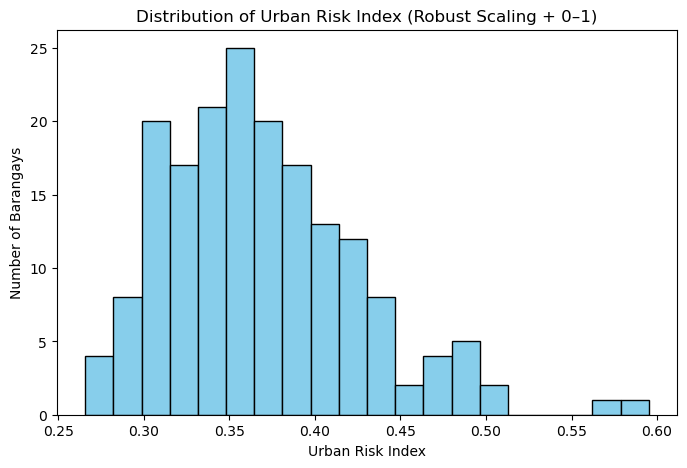

In [1]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import numpy as np

"""
Calculates the Urban Risk Index (URI) for standardized barangay-level data
and saves the final results to an SQLite database.

The URI is a composite score derived from several indicators using a
weighted sum approach, applying robust scaling and 0-1 normalization to
ensure comparability.

**Steps Performed:**
1.  **Connects** to the 'stand_datasets.db' SQLite database.
2.  **Drops** any existing 'URBAN_RISK_INDEX' table to ensure a fresh computation.
3.  **Loads** the latest available data for all component indices
    ($\text{Climate Exposure}$, $\text{NDVI}$, $\text{Amenity}$, $\text{Health}$,
    $\text{Population}$, $\text{RWI}$, and $\text{Barangay}$ coast distance).
4.  **Computes the Infrastructure Index** ($\text{infra\_index}$) by merging
    $\text{Health}$ and $\text{Amenity}$ data, applying $\text{RobustScaler}$ + $0–1$
    normalization to each component, and calculating a weighted average.
    * **Inversion Logic:** $\text{Health}$ coverage (percent reached) is **inverted**
        (higher coverage $\to$ lower risk), while $\text{Amenity}$ distances (meters)
        are **not inverted** (higher distance $\to$ higher risk).
5.  **Merges** all component indices into a single master DataFrame ($\text{urban\_df}$).
6.  **Applies** $\text{RobustScaler}$ + $0–1$ normalization to all remaining raw indicators
    ($\text{NDVI}$, $\text{Infrastructure Index}$, $\text{RWI}$, $\text{Coast Distance}$,
    $\text{Population}$) to create their respective $\text{risk}$ scores.
7.  **Calculates the final Urban Risk Index** ($\text{urban\_risk\_index}$) as a
    weighted sum of the six component risk scores.
8.  **Saves** the final DataFrame, including all components and the final index,
    to the database as the 'URBAN_RISK_INDEX' table.
9.  **Generates and displays** a histogram of the final $\text{urban\_risk\_index}$
    distribution for immediate visualization.

**Dependencies:**
- $\text{sqlite3}$ for database operations.
- $\text{pandas}$ for data manipulation and SQL reading.
- $\text{numpy}$ for weighted calculations.
- $\text{sklearn.preprocessing.RobustScaler}$ for robust data scaling.
- $\text{matplotlib.pyplot}$ for visualization.

:raises sqlite3.Error: For issues related to the database connection or execution
                     of SQL queries (e.g., table not found).
"""

# --- Step 1: Connect to database ---
conn = sqlite3.connect('stand_datasets.db')

# --- Step 2: Drop old Urban Risk Index table ---
conn.execute("DROP TABLE IF EXISTS URBAN_RISK_INDEX;")
conn.commit()
print("✅ Old URBAN_RISK_INDEX table removed.")

# --- Step 3: Load datasets ---
climate_df = pd.read_sql("SELECT adm4_pcode, climate_exposure_score FROM CLIMATE_EXPOSURE_INDEX;", conn)
ndvi_df = pd.read_sql("SELECT adm4_pcode, AVG(ndvi) AS ndvi FROM CLIMATE_STANDARDIZED GROUP BY adm4_pcode;", conn)

amenity_df = pd.read_sql("""
SELECT adm4_pcode,
       college_nearest AS college,
       community_centre_nearest AS community,
       school_nearest AS school,
       shelter_nearest AS shelter,
       town_hall_nearest AS town_hall,
       university_nearest AS university
FROM AMENITY_STANDARDIZED
WHERE date = (SELECT MAX(date) FROM AMENITY_STANDARDIZED)
""", conn)

health_df = pd.read_sql("""
SELECT adm4_pcode,
       brgy_healthcenter_pop_reached_pct_5min AS health_5min,
       brgy_healthcenter_pop_reached_pct_15min AS health_15min,
       brgy_healthcenter_pop_reached_pct_30min AS health_30min,
       hospital_pop_reached_pct_5min AS hospital_5min,
       hospital_pop_reached_pct_15min AS hospital_15min,
       hospital_pop_reached_pct_30min AS hospital_30min,
       rhu_pop_reached_pct_5min AS rhu_5min,
       rhu_pop_reached_pct_15min AS rhu_15min,
       rhu_pop_reached_pct_30min AS rhu_30min
FROM HEALTH_STANDARDIZED
WHERE date = (SELECT MAX(date) FROM HEALTH_STANDARDIZED)
""", conn)

pop_df = pd.read_sql("""
SELECT adm4_pcode, pop_count_total AS pop_total
FROM POP_STANDARDIZED
WHERE date = (SELECT MAX(date) FROM POP_STANDARDIZED)
""", conn)

rwi_df = pd.read_sql("""
SELECT adm4_pcode, rwi_mean
FROM RWI_STANDARDIZED
WHERE date = (SELECT MAX(date) FROM RWI_STANDARDIZED)
""", conn)

brgy_df = pd.read_sql("SELECT LOWER(adm4_pcode) AS adm4_pcode, brgy_distance_to_coast FROM BRGY_STANDARDIZED;", conn)
conn.close()

# --- Step 4: Compute Infrastructure Index (corrected inversion logic) ---
infra_df = pd.merge(health_df, amenity_df, on='adm4_pcode', how='outer')
infra_cols = [c for c in infra_df.columns if c != 'adm4_pcode']

# --- Define weights (unchanged) ---
infra_weights_dict = {
    'health_5min': 0.07, 'health_15min': 0.07, 'health_30min': 0.07,
    'hospital_5min': 0.07, 'hospital_15min': 0.07, 'hospital_30min': 0.07,
    'rhu_5min': 0.07, 'rhu_15min': 0.07, 'rhu_30min': 0.07,
    'college': 0.05, 'community': 0.05, 'school': 0.05,
    'shelter': 0.12, 'town_hall': 0.05, 'university': 0.05
}
infra_weights_dict = {k: v / sum(infra_weights_dict.values()) for k, v in infra_weights_dict.items()}

# --- Identify which columns are health coverage vs distance ---
health_cols = [c for c in infra_cols if any(x in c for x in ['health', 'hospital', 'rhu'])]
amenity_cols = [c for c in infra_cols if c in ['college', 'community', 'school', 'shelter', 'town_hall', 'university']]

# --- Helper scaling function ---
def robust_to_01(series, invert=False):
    """Apply robust scaling (median/IQR) + 0–1 normalization. 
       If invert=True, higher input values → lower normalized result."""
    scaler = RobustScaler()
    scaled = scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
    normalized = (scaled - scaled.min()) / (scaled.max() - scaled.min())
    return 1 - normalized if invert else normalized

# --- Apply correct inversion logic ---
# Health coverage (% reached): higher coverage = better → invert=True (so low risk)
# Amenity distances (m): higher distance = worse → invert=False (so high risk)
for c in health_cols:
    infra_df[c] = robust_to_01(infra_df[c], invert=True)
for c in amenity_cols:
    infra_df[c] = robust_to_01(infra_df[c], invert=False)

# --- Compute weighted Infrastructure Index ---
infra_weights = np.array([infra_weights_dict[c] for c in infra_cols])
infra_df['infra_index'] = infra_df[infra_cols].dot(infra_weights)

# --- Step 5: Merge all indices ---
urban_df = (climate_df
            .merge(ndvi_df, on='adm4_pcode', how='left')
            .merge(brgy_df, on='adm4_pcode', how='left')
            .merge(pop_df, on='adm4_pcode', how='left')
            .merge(rwi_df, on='adm4_pcode', how='left')
            .merge(infra_df[['adm4_pcode', 'infra_index']], on='adm4_pcode', how='left')
           )

# --- Step 6: Apply RobustScaler + 0–1 normalization ---
urban_df['ndvi_risk'] = robust_to_01(urban_df['ndvi'])
urban_df['infra_risk'] = robust_to_01(urban_df['infra_index'])
urban_df['rwi_risk'] = robust_to_01(urban_df['rwi_mean'])
urban_df['coast_risk'] = robust_to_01(urban_df['brgy_distance_to_coast'], invert=True)
urban_df['pop_risk'] = robust_to_01(urban_df['pop_total'], invert=False)

# --- Step 7: Compute weighted Urban Risk Index (weights unchanged) ---
urban_weights_dict = {
    'climate_exposure_score': 0.30,
    'pop_risk': 0.20,
    'ndvi_risk': 0.10,
    'infra_risk': 0.20,
    'rwi_risk': 0.15,
    'coast_risk': 0.05
}
weights_final = np.array([urban_weights_dict[c] for c in urban_weights_dict.keys()])
urban_df['urban_risk_index'] = urban_df[list(urban_weights_dict.keys())].dot(weights_final)

# --- Step 8: Save final table ---
save_cols = ['adm4_pcode','climate_exposure_score','pop_total','ndvi','infra_index',
             'rwi_mean','brgy_distance_to_coast','ndvi_risk','infra_risk','rwi_risk',
             'coast_risk','pop_risk','urban_risk_index']
urban_df = urban_df[[c for c in save_cols if c in urban_df.columns]].copy()

conn = sqlite3.connect('stand_datasets.db')
urban_df.to_sql('URBAN_RISK_INDEX', conn, if_exists='replace', index=False)
conn.close()

print("✅ Urban Risk Index and all component indicators saved with corrected Infrastructure logic and reproducible scaling.")

# --- Step 9: Visualization ---
plt.figure(figsize=(8,5))
plt.hist(urban_df['urban_risk_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Urban Risk Index (Robust Scaling + 0–1)')
plt.xlabel('Urban Risk Index')
plt.ylabel('Number of Barangays')
plt.show()


Silhouette Score: 0.5567
Calinski-Harabasz Index: 369.55
✅ Clustering results saved to URBAN_RISK_CLUSTER with all original columns preserved.


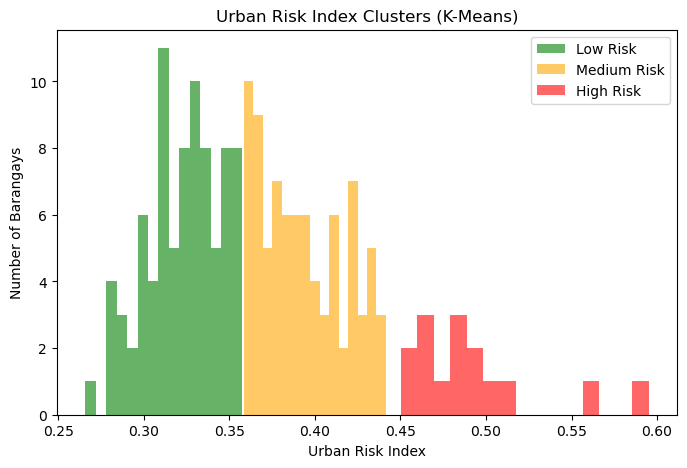

In [2]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

"""
Applies K-Means clustering to categorize barangays based solely on their
Urban Risk Index (URI) score and saves the results to the database.

This script clusters the one-dimensional URI data into **three distinct risk levels**
(Low, Medium, High), evaluates the quality of the resulting clusters, and prepares
the data for visualization and subsequent analysis.

**Steps Performed:**
1.  **Loads** the full $\text{URBAN\_RISK\_INDEX}$ table from 'stand_datasets.db'.
2.  **Performs K-Means clustering** with $k=3$ on the $\text{urban\_risk\_index}$
    column to define three clusters.
3.  **Labels the clusters** ($\text{risk\_level}$) by sorting the mean URI of each
    cluster and assigning the descriptive labels 'Low Risk' (0), 'Medium Risk' (1),
    and 'High Risk' (2) accordingly.
4.  **Calculates and prints** the **Silhouette Score** and **Calinski-Harabasz Index**
    to evaluate the cluster quality and separation.
5.  **Saves** the DataFrame, including the original columns and the new cluster
    assignment columns ($\text{cluster}$, $\text{risk\_level}$, $\text{risk\_label}$),
    to the database as the $\text{URBAN\_RISK\_CLUSTER}$ table.
6.  **Generates and displays** a layered histogram that visualizes the distribution
    of the $\text{urban\_risk\_index}$ score, color-coded by the assigned risk level
    (Low, Medium, High).

**Clustering Evaluation Metrics:**
- **Silhouette Score:** Measures how similar a data point is to its own cluster
  compared to other clusters (values near $+1$ indicate well-separated clusters).
- **Calinski-Harabasz Index:** Measures the ratio of between-cluster variance to
  within-cluster variance (higher values generally indicate better clustering).

:raises sqlite3.Error: If the database connection fails or the $\text{URBAN\_RISK\_INDEX}$
                     table cannot be read.
"""


# --- Step 1: Load full Urban Risk Index table (all columns) ---
conn = sqlite3.connect('stand_datasets.db')
urban_df = pd.read_sql("SELECT * FROM URBAN_RISK_INDEX;", conn)
conn.close()

# --- Step 2: K-Means clustering on urban_risk_index only ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
urban_df['cluster'] = kmeans.fit_predict(urban_df[['urban_risk_index']])

# --- Step 3: Sort clusters by mean urban_risk_index to label Low, Medium, High ---
cluster_order = urban_df.groupby('cluster')['urban_risk_index'].mean().sort_values().index
cluster_mapping = {old: new for new, old in enumerate(cluster_order)}
urban_df['risk_level'] = urban_df['cluster'].map(cluster_mapping)
risk_label_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
urban_df['risk_label'] = urban_df['risk_level'].map(risk_label_map)

# --- Step 4: Evaluation metrics ---
sil_score = silhouette_score(urban_df[['urban_risk_index']], urban_df['risk_level'])
ch_score = calinski_harabasz_score(urban_df[['urban_risk_index']], urban_df['risk_level'])
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

# --- Step 5: Save clustered results (keep all original columns) ---
conn = sqlite3.connect('stand_datasets.db')
urban_df.to_sql('URBAN_RISK_CLUSTER', conn, if_exists='replace', index=False)
conn.close()
print("✅ Clustering results saved to URBAN_RISK_CLUSTER with all original columns preserved.")

# --- Step 6: Visualization ---
plt.figure(figsize=(8,5))
colors = {'Low Risk':'green', 'Medium Risk':'orange', 'High Risk':'red'}
for label in risk_label_map.values():
    plt.hist(
        urban_df[urban_df['risk_label']==label]['urban_risk_index'],
        bins=15, alpha=0.6, label=label, color=colors[label]
    )
plt.title('Urban Risk Index Clusters (K-Means)')
plt.xlabel('Urban Risk Index')
plt.ylabel('Number of Barangays')
plt.legend()
plt.show()


In [382]:
urban_df.head()

,adm4_pcode,climate_exposure_score,pop_total,ndvi,infra_index,rwi_mean,brgy_distance_to_coast,ndvi_risk,infra_risk,rwi_risk,coast_risk,pop_risk,urban_risk_index,cluster,risk_level,risk_label
0,ph063022001,0.336261,-0.101248,-0.396651,0.298776,1.382495,-0.725769,0.812472,0.592437,0.348195,0.925268,0.189198,0.436945,0,1,Medium Risk
1,ph063022003,0.337041,-0.477470,-0.344274,0.379013,2.342979,0.165168,0.792488,0.475868,0.051354,0.724577,0.118437,0.343154,2,0,Low Risk
2,ph063022004,0.336787,1.276712,1.278059,0.084594,1.331623,0.365861,0.173497,0.903601,0.363917,0.679369,0.448370,0.477336,0,1,Medium Risk
3,ph063022005,0.337041,0.334198,-0.344274,0.125826,2.235535,-0.056495,0.792488,0.843699,0.084559,0.774508,0.271099,0.454730,0,1,Medium Risk
4,ph063022006,0.337041,-0.540216,-0.344274,0.223698,1.475280,1.731573,0.792488,0.701509,0.319519,0.371731,0.106635,0.408504,0,1,Medium Risk


In [365]:
print(urban_df.columns.tolist())



['adm4_pcode', 'climate_exposure_score', 'pop_total', 'ndvi', 'infra_index', 'rwi_mean', 'brgy_distance_to_coast', 'ndvi_risk', 'infra_risk', 'rwi_risk', 'coast_risk', 'pop_risk', 'urban_risk_index', 'cluster', 'risk_level', 'risk_label']


In [5]:
urban_df.to_csv("URBAN_RISK8.0.csv", index=False)